# **DSGA 1001 Capstone Project**

By: Dhruv, Elizabeth, Eugenia, Sarvesh


# Introduction to Our Dataset

In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import re

#import csv file as pandas df
df = pd.read_csv('AB_NYC_2019.csv')
#convert to standard df notation

In [47]:
#a check for where nulls/na are
print(df.head())
df.isnull().sum()
#we see it's mostly in the reviews columns

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [48]:
#some high level statistics on the dataset to familiarize ourselves

#let us first remove anything with a price of 0 as this doesn't make much sense
df = df[df['price'] != 0]

print(df['price'].mean())
#mean price across all is $152.72 a night

#price and neighborhood relationship
#get all neighborhoods and look at mean price
neighborhood_price = pd.DataFrame([df['neighbourhood'], df['price']])
data = pd.DataFrame(data = np.transpose(neighborhood_price))

#get unique neighborhoods
unique_neighborhoods = data['neighbourhood'].unique()
unique_neighborhoods.sort()
print(len(unique_neighborhoods))
#there's 221 unique neighborhoods

#for each unique neighborhood we want mean price
mean_prices = data.groupby('neighbourhood').mean()
print(mean_prices)

#neighborhoods with more & less expensive prices
print('more expensive')
print(mean_prices[mean_prices['price'] >= 152.71])
print('less expensive')
print(mean_prices[mean_prices['price'] <= 81.73])

152.75505277800508
221
                      price
neighbourhood              
Allerton          87.595238
Arden Heights     67.250000
Arrochar         115.000000
Arverne          171.779221
Astoria          117.187778
...                     ...
Windsor Terrace  138.993631
Woodhaven         67.170455
Woodlawn          60.090909
Woodrow          700.000000
Woodside          85.097872

[221 rows x 1 columns]
more expensive
                         price
neighbourhood                 
Arverne             171.779221
Battery Park City   367.557143
Bayside             157.948718
Belle Harbor        171.500000
Boerum Hill         176.135593
Breezy Point        213.333333
Brooklyn Heights    209.064935
Carroll Gardens     175.914163
Chelsea             249.738544
Chinatown           161.497283
City Island         173.000000
Civic Center        191.942308
Clinton Hill        181.893357
Cobble Hill         211.929293
Columbia St         162.952381
DUMBO               196.305556
East Village    

In [49]:
#same exploration as above but for neighborhood group

#get all neighborhoods groups and look at mean price
neighborhoodgroup_price = pd.DataFrame([df['neighbourhood_group'], df['price']])
data1 = pd.DataFrame(data = np.transpose(neighborhoodgroup_price))

#get unique neighborhoods
unique_neighborhoodgroup = data1['neighbourhood_group'].unique()
unique_neighborhoodgroup.sort()
print(len(unique_neighborhoodgroup))
#there's 5 unique neighborhood groups

#for each unique neighborhood group we want mean price
mean_group_prices = data1.groupby('neighbourhood_group').mean()
print(mean_group_prices)
print(mean_group_prices.describe())

5
                          price
neighbourhood_group            
Bronx                 87.577064
Brooklyn             124.438915
Manhattan            196.884903
Queens                99.517649
Staten Island        114.812332
            price
count    5.000000
mean   124.646173
std     42.780670
min     87.577064
25%     99.517649
50%    114.812332
75%    124.438915
max    196.884903


# Variety of Hypothesis Tests

In [50]:
#Neighborhood Group & Price

#List of Neigbourhood Groups
list = df['neighbourhood_group'].unique()

#Create DataFrame for each Neighboorhood group
dfbrook = df.loc[df['neighbourhood_group']==list[0]]
dfman = df.loc[df['neighbourhood_group']==list[1]]
dfque = df.loc[df['neighbourhood_group']==list[2]]
dfst = df.loc[df['neighbourhood_group']==list[3]]
dfbr = df.loc[df['neighbourhood_group']==list[4]]

#Slice each dataframe on price and convert to an numpy array
brook = np.array(dfbrook['price'])
man = np.array(dfman['price'])
que = np.array(dfque['price'])
st = np.array(dfst['price'])
br = np.array(dfbr['price'])

#Remove non-finite elements element wise from each array
brook1 = brook[np.isfinite(brook)]
man1 = man[np.isfinite(man)]
que1 = que[np.isfinite(que)]
st1 = st[np.isfinite(st)]
br1 = br[np.isfinite(br)]

##Kruskal-Wallis H-test for independent samples
h1,p1 = stats.kruskal(brook1, man1, que1, st1, br1)
print(h1, p1)

7023.124698515672 0.0


In [51]:
#Total Reviews & Price

#Sort data frame by number of reviews in ascending order
dfsorted = df.sort_values(by=['number_of_reviews'])

#Median split of DataFrame into dataframe frame with less reviews and dataframe with more reviews
lessreviews = dfsorted.iloc[0:24447,:]
morereviews = dfsorted.iloc[24447:48895,:]

#Slice dataframes on price and convert to numpy arrays
lessreviewsprice = np.array(lessreviews['price'])
morereviewsprice = np.array(morereviews['price'])

#Remove non-finite elemetns from numpy arrays
lessreviewsprice = lessreviewsprice[np.isfinite(lessreviewsprice)]
morereviewsprice = morereviewsprice[np.isfinite(morereviewsprice)]

# Two Sided Mann–Whitney U test
u1,p1 = stats.mannwhitneyu(lessreviewsprice,morereviewsprice)

# One Sided Mann–Whitney U test Greater
u2,p2 = stats.mannwhitneyu(lessreviewsprice,morereviewsprice, alternative='greater')

# One Sided Mann–Whitney U test Less
u3,p3 = stats.mannwhitneyu(lessreviewsprice,morereviewsprice, alternative='less')

#Independent Samples T-test
t1,p4= stats.ttest_ind(lessreviewsprice,morereviewsprice, alternative='greater')

print(u1, p1)
print(u2, p2)
print(u3, p3)
print(t1, p4)

311174497.0 1.303907302911765e-15
311174497.0 6.519536514558825e-16
311174497.0 0.9999999999999993
12.796122094542877 9.897169061989184e-38


In [52]:
#Monthly Ratings & Price

#Remove rows from the dataframe where are missing values for 'reviews_per_month'
dfna = df[df['reviews_per_month'].notna()]

#Sort df by reviews per month in ascending order
dfsorted = dfna.sort_values(by=['reviews_per_month'])

#Median Split into two two data frames with less reviews per month and more reviews per month
lessrpm = dfsorted.iloc[0:19421,:]
morerpm = dfsorted.iloc[19421:38843,:]

#Slice and convert to numpy array of price of less reviews per month and numpy array of price of more reviews per month
lessrpmprice = np.array(lessrpm['price'])
morerpmprice = np.array(morerpm['price'])

#Remove nan values from numpy arrays element wise
lessratingsprice = lessrpmprice[np.isfinite(lessrpmprice)]
morerpmprice = morerpmprice[np.isfinite(morerpmprice)]

# Two Sided Mann–Whitney U test
u1,p1 = stats.mannwhitneyu(lessrpmprice,morerpmprice)

# One Sided Mann–Whitney U test Greater
u2,p2 = stats.mannwhitneyu(lessrpmprice,morerpmprice, alternative='greater')

# One Sided Mann–Whitney U test Less
u3,p3 = stats.mannwhitneyu(lessrpmprice,morerpmprice, alternative='less')

#Independent Samples T-test
t1,p4 = stats.ttest_ind(lessrpmprice,morerpmprice)

print(u1, p1)
print(u2, p2)
print(u3, p3)
print(t1, p4)

192481515.0 0.0003120168430868245
192481515.0 0.00015600842154341225
192481515.0 0.9998439921224284
4.088997943134403 4.341124879703943e-05


In [53]:
#Minimum Nights & Price

#Create dataframe with rows of only room_type Entire home/apt
dfentire = df.loc[df['room_type']=='Entire home/apt']

#Sort DataFrame in ascending order by minimimum nights
dfsorted = dfentire.sort_values(by=['minimum_nights'])

#Median split high low into two data frames one with low minimum nights and one with high minimum nights
lowmn = dfsorted.iloc[0:12704,:]
highmn = dfsorted.iloc[12704:25409,:]

#Slice and convert to numpy array of price of low minimum nights and numpy array of price of high minimum nights
lowmnprice = np.array(lowmn['price'])
highmnprice = np.array(highmn['price'])

#Remove nan values from numpy arrays element wise
lowmnprice = lowmnprice[np.isfinite(lowmnprice)]
highmnprice = highmnprice[np.isfinite(highmnprice)]

# Two Sided Mann–Whitney U test
u1,p1 = stats.mannwhitneyu(lowmnprice,highmnprice)

# One Sided Mann–Whitney U test Greater
u2,p2 = stats.mannwhitneyu(lowmnprice,highmnprice, alternative='greater')

# One Sided Mann–Whitney U test Less
u3,p3 = stats.mannwhitneyu(lowmnprice,highmnprice, alternative='less')

#Independent Samples T-test
t1,p4 = stats.ttest_ind(lowmnprice,highmnprice)

print(u1, p1)
print(u2, p2)
print(u3, p3)
print(t1, p4)

81771778.0 0.06400620342446665
81771778.0 0.03200310171223333
81771778.0 0.9679970211227344
2.227548158789696 0.02591938503404691


In [54]:
#Number of Host Listings & Price

#Remove rows with nan values for 'calculated_host_listings_count'
dfna = df[df['calculated_host_listings_count'].notna()]

#Sort dataframe by 'calculated_host_listings_count' in ascending order
dfsorted = dfna.sort_values(by=['calculated_host_listings_count'])

dfunique = dfsorted.drop_duplicates(subset='host_id', keep="first")

#Median split into two dataframes with low host listing count and high host listing count
lowhlc = dfsorted.iloc[0:24447,:]
highhlc = dfsorted.iloc[24447:48895,:]

##Slice and convert to numpy array of price of low host listing count and numpy array of price of high host listing count
lowhlcprice = np.array(lowhlc['price'])
highhlcprice = np.array(highhlc['price'])

#Remove nan values from numpy arrays element wise
lowhlcprice = lowhlcprice[np.isfinite(lowhlcprice)]
highhlcprice = highhlcprice[np.isfinite(highhlcprice)]

# Two Sided Mann–Whitney U test
u1,p1 = stats.mannwhitneyu(lowhlcprice,highhlcprice)

# One Sided Mann–Whitney U test Greater
u2,p2 = stats.mannwhitneyu(lowhlcprice,highhlcprice, alternative='greater')

# One Sided Mann–Whitney U test Less
u3,p3 = stats.mannwhitneyu(lowhlcprice,highhlcprice, alternative='less')

#Independent Samples T-test
t1,p4 = stats.ttest_ind(lowhlcprice,highhlcprice, alternative = 'greater')

print(u1, p1)
print(u2, p2)
print(u3, p3)
print(t1, p4)

327491828.5 4.6777345881442077e-76
327491828.5 2.3388672940721038e-76
327491828.5 1.0
5.80002830697294 3.3355540475105067e-09


In [55]:
#Keyword 'Prewar' & Price

#pre-war - prices of prewar listings and non-prewar listings
data = pd.DataFrame([df['name'], df['price']])
data = pd.DataFrame(data = np.transpose(data))

#remove nans
data = data.dropna()

#first group: find pre-war in name
prewar_lst = ['pre-war', 'Pre-War', 'Pre War' 'pre war', 'Prewar', 'PreWar', 'Pre-war']

prewar = data[data['name'].str.contains("prewar")]
for ele in prewar_lst:
    group = data[data['name'].str.contains(ele)]
    prewar = pd.concat([prewar, group], axis = 0, ignore_index = True)

prewar_lst2 = ['prewar','pre-war', 'Pre-War', 'Pre War' 'pre war', 'Prewar', 'PreWar', 'Pre-war']

for ele in prewar_lst2:
    data.drop(data.index[data['name'].str.contains(ele)], inplace = True)

prewar = prewar['price'].tolist()
data = data['price'].tolist()

M1 = np.array(prewar)
M2 = np.array(data)

#now we have data and prewar as two groups
#null hypothesis is such that there is no difference in the prices of these two groups
u1,p1 = stats.mannwhitneyu(M1, M2)
print(u1,p1)

2855738.5 0.016035919202045883


In [56]:
#Keyword 'Luxury', 'Modern' & Price

#keyterms luxury vs. modern
data = pd.DataFrame([df['name'], df['price']])
data = pd.DataFrame(data = np.transpose(data))

#remove nans
data = data.dropna()

#listings with 'luxury' in the name
luxury_group = data[data['name'].str.contains("luxury", "Luxury")]

#listings with 'modern' in the name
modern_group = data[data['name'].str.contains("modern", "Modern")]

luxury_group = luxury_group['price'].tolist()
modern_group = modern_group['price'].tolist()

M1 = np.array(luxury_group)
M2 = np.array(modern_group)

#now we have luxury_group and modern_group as two groups
#null hypothesis is such that there is no difference in the prices of these two groups

u1,p1 = stats.mannwhitneyu(M1, M2)

#one-sided, greater
u2,p2 = stats.mannwhitneyu(M1,M2, alternative='greater')

#one-sided, less
u3,p3 = stats.mannwhitneyu(M1,M2, alternative='less')

print(u1, p1)
print(u2, p2)
print(u3, p3)

36041.0 0.0002246212456198628
36041.0 0.0001123106228099314
36041.0 0.9998879687132533


# Regression Analysis

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
#data pre-processing
#make price last column
df['listing_price'] = df['price']
df1 = df.drop(['price'], axis=1)
df1.head() 

#data cleansing and column drops of last_review and reviews_per_month as we're missing too much data here and availability_365 as it doesn't provide useful information
#df1.isnull().sum()
df1 = df1.drop(['last_review', 'reviews_per_month'], axis=1)
df1 = df1.dropna()

#drop some other columns we won't use for correlations/regression
df1 = df1.drop(['name', 'host_name'], axis=1)
df1.shape #we are left with 10 predictor variables

#we also need to numerically encode some of our data - we will do this for neighbourhood, neighbourhood_group and room_type
df1['neighborhood'] = df1['neighbourhood'].astype('category')
df1['neighborhood'] = df1['neighborhood'].cat.codes

df1['neighborhood_group'] = df1['neighbourhood_group'].astype('category')
df1['neighborhood_group'] = df1['neighborhood_group'].cat.codes

df1['accomodation'] = df1['room_type'].astype('category')
df1['accomodation'] = df1['accomodation'].cat.codes

#finalized df
df1 = df1[['neighbourhood_group', 'neighbourhood', 'room_type', 'id', 'host_id', 'latitude', 'longitude', 
           'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'neighborhood', 
          'neighborhood_group', 'accomodation', 'availability_365', 'listing_price']]

In [59]:
df1.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
id                                0
host_id                           0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
neighborhood                      0
neighborhood_group                0
accomodation                      0
availability_365                  0
listing_price                     0
dtype: int64

In [60]:
df1.shape

(48847, 15)

In [61]:
#outlier removal
min_thres, max_thres = df1.listing_price.quantile([0.05,0.95])
df1 = df1[(df1.listing_price > min_thres) & (df1.listing_price < max_thres)]

In [62]:
df1.shape

(43598, 15)

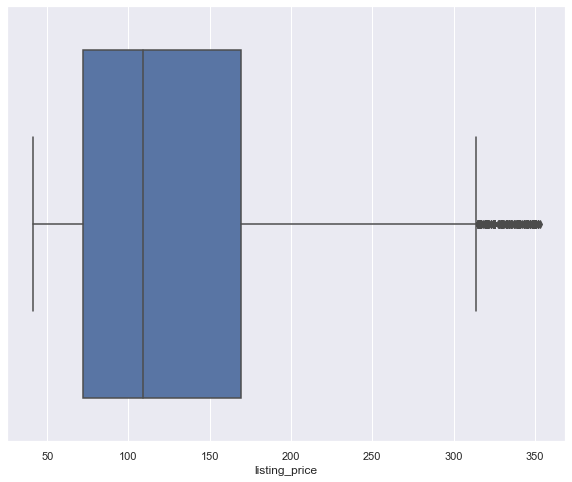

In [63]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(df1.listing_price);

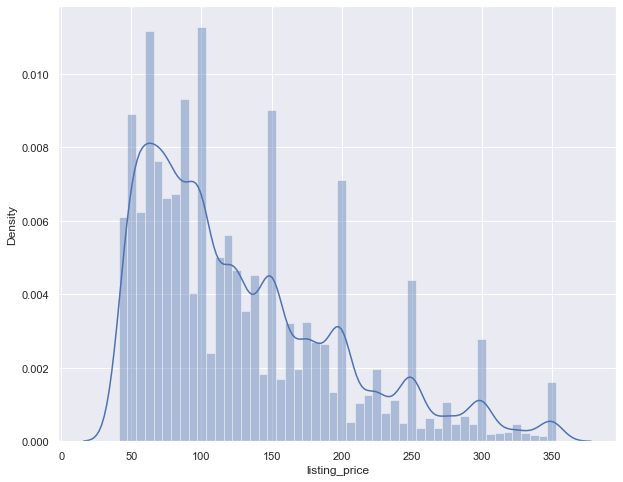

In [64]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.distplot(df1.listing_price);

In [65]:
#run correlations between variables and let's find highest correlated columns
vars_matrix = df1.iloc[:,3:] #we have 12 columns

print(vars_matrix.shape)

all_vars = vars_matrix.to_numpy()
n = 12 #number of features in the data
correlations = np.empty([n,n])

#find correlations
for i in range(n):
    for j in range(n):
        correlations[i][j] = stats.spearmanr(all_vars[:,i], all_vars[:,j])[0]

print(correlations)

(43598, 12)
[[ 1.          0.54736417  0.00363604  0.07207046 -0.06748595 -0.30793728
   0.12527827 -0.03129746  0.06197683  0.05011617  0.15349199 -0.01705665]
 [ 0.54736417  1.          0.05414596  0.10913944 -0.1407941  -0.12350568
   0.1363101  -0.02527267  0.13817767  0.0987824   0.16342539 -0.07029302]
 [ 0.00363604  0.05414596  1.          0.037521    0.02590089 -0.0448624
   0.01337703  0.27858229  0.53472834  0.00956659 -0.01190414  0.11068987]
 [ 0.07207046  0.10913944  0.037521    1.         -0.12666627  0.08155372
   0.05205522 -0.16812887 -0.04283748  0.19605311  0.08824592 -0.4040659 ]
 [-0.06748595 -0.1407941   0.02590089 -0.12666627  1.         -0.16902212
   0.05564863  0.04951279 -0.02644668 -0.24189478  0.07276309  0.12551271]
 [-0.30793728 -0.12350568 -0.0448624   0.08155372 -0.16902212  1.
   0.06074149 -0.05258409 -0.02022226 -0.01101098  0.2539539  -0.05068178]
 [ 0.12527827  0.1363101   0.01337703  0.05205522  0.05564863  0.06074149
   1.         -0.03200358  0.

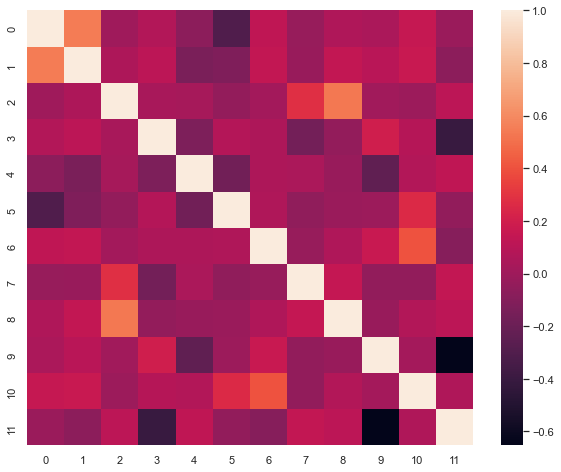

In [66]:
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.heatmap(correlations)

In [67]:
df1 = df1[['minimum_nights', 'number_of_reviews','neighborhood','neighborhood_group', 'accomodation', 'availability_365', 'calculated_host_listings_count', 'listing_price']]
df1

,minimum_nights,number_of_reviews,neighborhood,neighborhood_group,accomodation,availability_365,calculated_host_listings_count,listing_price
0,1,9,108,1,1,365,6,149
1,1,45,127,2,0,355,2,225
2,3,0,94,2,1,365,1,150
3,1,270,41,1,0,194,1,89
4,10,9,61,2,0,0,1,80
...,...,...,...,...,...,...,...,...
48889,1,0,105,3,1,163,2,65
48890,2,0,13,1,1,9,2,70
48892,10,0,94,2,0,27,1,115
48893,1,0,95,2,2,2,6,55


In [68]:
#run regression on all variables with price as predictor

X = df1.iloc[:,0:7]
Y = df1.iloc[:,7]

#split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

train_error = 0
test_error = 0
    
reg = LinearRegression()
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

train_error = mean_squared_error(Y_train, y_pred)
test_error = mean_squared_error(Y_test, y_pred_test)
acc1 = r2_score(Y_test, y_pred_test)

print(train_error)
print(test_error)
print(acc1)

3228.4165447847045
3165.6011484688743
0.349186830484825


In [69]:
import warnings
warnings.filterwarnings("ignore")

#ridge regression
alphas = [1e-5, 0.1, 1, 10, 20]

ridge_train_error = 0
ridge_test_error = 0

for alpha in alphas:
    
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(X_train, Y_train)
    
    y_pred = ridgereg.predict(X_train)
    y_pred_test = ridgereg.predict(X_test)
    
    ridge_train_error = mean_squared_error(Y_train, y_pred)
    ridge_test_error = mean_squared_error(Y_test, y_pred_test)
    acc2 = r2_score(Y_test, y_pred_test)
    
    print(alpha)
    print(ridge_train_error)
    print(ridge_test_error)
    print(acc2)
    print('')


1e-05
3228.4165447847045
3165.601148438646
0.3491868304910396

0.1
3228.416544953406
3165.6008463525704
0.3491868925966515

1
3228.4165616516816
3165.598142811206
0.34918744841535443

10
3228.4182282875154
3165.5726392272595
0.34919269167485667

20
3228.423264639095
3165.5475548942936
0.34919784874091686



In [70]:
#lasso regression
alphas = [1e-3, 1e-2, 1e-1, 1]

lasso_train_error = 0
lasso_test_error = 0

for alpha in alphas:
    
    lassoreg = Lasso(alpha=alpha)
    lassoreg.fit(X_train, Y_train)
    
    y_pred = lassoreg.predict(X_train)
    y_pred_test = lassoreg.predict(X_test)
    
    lasso_train_error = mean_squared_error(Y_train, y_pred)
    lasso_test_error = mean_squared_error(Y_test, y_pred_test)
    acc3 = r2_score(Y_test, y_pred_test)
    
    print(alpha)
    print(lasso_train_error)
    print(lasso_test_error)
    print(acc3)
    print('')
    
#best test error at alpha of 1e-1

0.001
3228.416550397883
3165.599543767666
0.34918716039394193

0.01
3228.4171061112957
3165.586495011122
0.34918984307637924

0.1
3228.4726452506843
3165.502407690121
0.349207130515109

1
3234.0292607167485
3169.5507073519684
0.348374844130784



# Principal Component Analysis

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [72]:
#numerical columns only for PCA
df2 = df1[['minimum_nights', 'number_of_reviews','availability_365','calculated_host_listings_count','listing_price']]
df2

,minimum_nights,number_of_reviews,availability_365,calculated_host_listings_count,listing_price
0,1,9,365,6,149
1,1,45,355,2,225
2,3,0,365,1,150
3,1,270,194,1,89
4,10,9,0,1,80
...,...,...,...,...,...
48889,1,0,163,2,65
48890,2,0,9,2,70
48892,10,0,27,1,115
48893,1,0,2,6,55


In [73]:
df2.isnull().sum()

minimum_nights                    0
number_of_reviews                 0
availability_365                  0
calculated_host_listings_count    0
listing_price                     0
dtype: int64

In [74]:
#run the PCA
zscored_df2 = stats.zscore(df2)
pca = PCA().fit(zscored_df2)

#get the eigenvalues
eig_vals = pca.explained_variance_

#get loadings
loadings = pca.components_

#rotated data
rotated_df2 = pca.fit_transform(zscored_df2)

cov_exp = eig_vals/sum(eig_vals)*100

print(len(eig_vals))
print(pca.explained_variance_ratio_)

5
[0.28380247 0.22977117 0.19442931 0.16138757 0.13060948]


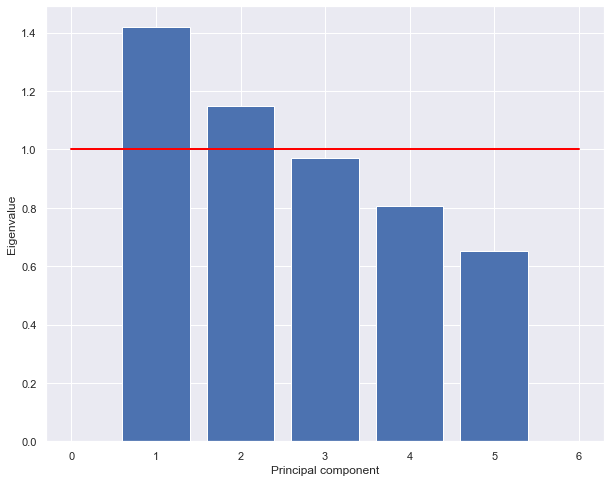

In [75]:
#scree plot to visualize this
n = len(eig_vals)
plt.figure(figsize = (10,8))
plt.bar(np.linspace(1,n,n),eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,n+1],[1,1],color='red',linewidth=2) #kaiser line
#based on the kaiser criterion we have two principal components

In [76]:
loadings2 = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings2, columns=['Component1', 'Component2'], index=df2.columns)
loading_matrix
#calculated_host_listings_count most significant in component1 and number_of_reviews most significant in component2

ValueError: Shape of passed values is (5, 5), indices imply (5, 2)

In [ ]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = 'b',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'b', ha = 'center', va = 'center')
    plt.xlim(-0.5,1)
    plt.ylim(-0.5,1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
loading_plot(pca.components_.T, df2.columns)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

In [ ]:
#new PCA - we will choose a PCA with 2 components
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(zscored_df2)
scores = pca.transform(zscored_df2)

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

#compute within clusters sum of squares
wcss = []

#check for 1 up to 10 clusters
for i in range(1,10):
    k_means_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    k_means_pca.fit(scores)
    wcss.append(k_means_pca.inertia_)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--')

In [ ]:
#Do Not Rerun Code - Time Consuming
k_silhouette = []
#check for to 2 up to 10 clusters
for i in range(2,10):
    k_means_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    k_means_pca.fit(scores)
    sil_score = silhouette_score(scores, k_means_pca.labels_)
    k_silhouette.append(sil_score)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(2,10), k_silhouette, marker = 'o', linestyle = '--')

In [ ]:
#it looks like we could run kmeans with anywhere from 1-3 clusters based on the wcss and silhouette analysis
k_means_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state=0)
k_means_pca.fit(scores)

In [ ]:
df_pca_kmeans = pd.concat([df2.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
df_pca_kmeans.columns.values[-2:] = ['Component1', 'Component2']
df_pca_kmeans['Labels'] = k_means_pca.labels_
df_pca_kmeans['Segment'] = df_pca_kmeans['Labels'].map({0:'first', 1:'second', 2:'third'})

In [ ]:
df_pca_kmeans

In [ ]:
x_axis = df_pca_kmeans['Component1']
y_axis = df_pca_kmeans['Component2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Segment'], palette="colorblind")

# Further Machine Learning Methods

Two-variable MLR

In [ ]:
df2

In [ ]:
#multiple linear regression with just components from PCA - curious if any price predictability
X = pd.concat([df2.iloc[:,1], df2.iloc[:,3]], axis=1)
Y = df2.iloc[:,4]

#split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

train_error = 0
test_error = 0
    
reg = LinearRegression()
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

train_error = mean_squared_error(Y_train, y_pred)
test_error = mean_squared_error(Y_test, y_pred_test)
acc = r2_score(Y_test, y_pred_test)

print(train_error)
print(test_error)
print(acc)
#looks like not - the two-variable model on its own is not good 

In [ ]:
#multiple linear regression with components from PCA and categoricals
categoricals = df1[['neighborhood', 'neighborhood_group', 'accommodation']]
X = pd.concat([X, categoricals], axis = 1)
Y = df2.iloc[:,4]

#split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

train_error = 0
test_error = 0
    
reg = LinearRegression()
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

train_error = mean_squared_error(Y_train, y_pred)
test_error = mean_squared_error(Y_test, y_pred_test)
acc = r2_score(Y_test, y_pred_test)

print(train_error)
print(test_error)
print(acc)
#this is significantly better with categoricals

Simple Neural Net

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
#columns from the PCA and categoricals
X_nn = X

In [ ]:
#for our supervised learning models we will split our data into training and testing sets once again
Y_nn = df2.iloc[:,4]

X_train, X_test, Y_train, Y_test = train_test_split(X_nn,Y_nn,test_size=0.2,random_state=1)

In [ ]:
annreg = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1, max_iter=2000).fit(X_train, Y_train)
rsq_train = annreg.score(X_train, Y_train)
rsq_test = annreg.score(X_test, Y_test)

print(rsq_train)
print(rsq_test)
#the result provides some improvement versus our regression models 


Decision Tree & Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_nn,Y_nn,test_size=0.2,random_state=1)

dtree = DecisionTreeRegressor(max_depth=10)
dtree.fit(X_train, Y_train)
#y_pred = dtree.predict(X_test)

rsq_train = r2_score(Y_train, dtree.predict(X_train))
rsq_test = r2_score(Y_test, dtree.predict(X_test))

print(rsq_train)
print(rsq_test)

In [ ]:
randfor = RandomForestRegressor(max_depth=4, n_estimators=100).fit(X_train, Y_train)

rsq_train = r2_score(Y_train, randfor.predict(X_train))
rsq_test = r2_score(Y_test, randfor.predict(X_test))

In [ ]:
print(rsq_train)
print(rsq_test)

In [ ]:
visualize_classifier(dtree, X, y)